In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df= pd.read_csv("C:\\Users\\shris\\CT\\spam_or_not_spam.csv")
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [8]:
df.shape

(3000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [10]:
df.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [11]:
df['email'].isnull().sum()

1

In [12]:
df['email'].fillna(method = 'ffill', inplace = True)
df['email'].isnull().sum()

0

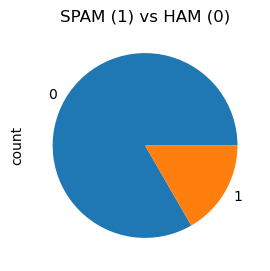

In [13]:
plt.figure(figsize=(3,3))
spam_ham = pd.value_counts(df['label'],sort = True)
spam_ham.plot(kind = 'pie')
plt.title('SPAM (1) vs HAM (0)')
plt.show()

In [14]:
X = df.email
y = df.label

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(model.score(X_test, y_test))

0.9333333333333333


In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       509
           1       0.98      0.57      0.72        91

    accuracy                           0.93       600
   macro avg       0.95      0.78      0.84       600
weighted avg       0.94      0.93      0.93       600



[[508   1]
 [ 39  52]]


<Axes: title={'center': 'Confusion Matrix Visualization'}>

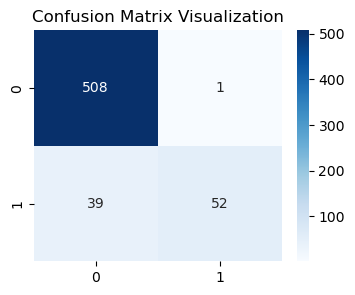

In [21]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
print(cf_matrix)
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix Visualization')
sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')